In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import os

In [2]:
data_wanted = pd.read_csv('from_lilianne.dat', delim_whitespace=True, usecols=['idx','objectID','hostless'])

wanted_names = list(data_wanted[data_wanted['hostless']]['objectID']) + ['ZTF23abdynfn','ZTF22aaaihet','ZTF23absflyh',
                                                                         'ZTF23aarlxdf','ZTF23aawhcjb','ZTF23aajenxf',
                'ZTF22aaljlzq','ZTF22abnwvyc','ZTF23aabtgej','ZTF22aadeuwu','ZTF23aafmjbx','ZTF23aagaiju',
                'ZTF22aaahull','ZTF22aaszlph','ZTF23aaqfdby','ZTF22abzvyku','ZTF22aahhubz','ZTF23aaelzdb',
                'ZTF23aboebgh','ZTF23aamxeoe','ZTF23aamqonh','ZTF22abtltcw','ZTF22aaausrb','ZTF21abiwpjm',
                'ZTF22abvaggn','ZTF22abyuoan','ZTF20aayvmyh','ZTF22aaaeohg','ZTF22aasaapb','ZTF22aalmrqp',
                'ZTF23aanukvi','ZTF22abmpqbq','ZTF23abbsfxp','ZTF22aaombjf','ZTF22abzbyyw','ZTF22abfxmvf',
                'ZTF22aaafohf','ZTF22abfyvhf','ZTF22aafumyr','ZTF23aakmewi','ZTF23ablspnz','ZTF23aanuvih',
                'ZTF22aahecwj','ZTF22abnqzle','ZTF23aafggjj','ZTF22aaogwbd','ZTF22aadetzs','ZTF23aapvrkk',
                'ZTF23abgsmsg','ZTF22abjafpr','ZTF23aamsekn','ZTF23abcqzvm','ZTF23abgvtxr','ZTF22aajhtpy',
                'ZTF22abvngdr','ZTF23aaazegi','ZTF22aaagvyp','ZTF23aaejvzv','ZTF23abgzmfs','ZTF23abcufxh',
                'ZTF22aapuake','ZTF22aadlmgg','ZTF22aasoali','ZTF23abaslfm','ZTF22ablhldn','ZTF22abtotgu',
                'ZTF23aagdbbv','ZTF23aaxyawz','ZTF22aaftcmp','ZTF23abqygjv','ZTF18aaapivw']

wanted_names = np.unique(np.array(wanted_names))

should_not_survive = ['ZTF22aauiabm',
'ZTF23abmoxlu',
'ZTF23aaiyexs',
'ZTF22aakdbia',
'ZTF22abbausm',
'ZTF22aaajjcq',
'ZTF22aazmooy',
'ZTF23aaaairl',
'ZTF22aafoqrd',
'ZTF23absbyol',
'ZTF22aanrqje',
'ZTF23aadvjqb',
'ZTF22abzakdd',
'ZTF22aagzbux',
'ZTF22absxatm',
'ZTF22aapubuy',
'ZTF23aajlkxc',
'ZTF22aboixdd',
'ZTF23aaawcvx',
'ZTF22aabtyli',
'ZTF22abahblc',
'ZTF19abszdld',
'ZTF22aahebcu','ZTF18aajpqbj','ZTF20aclhwqx','ZTF20abobsuw','ZTF20aazqifr','ZTF18abciaaf','ZTF18aagrcbh','ZTF18abcyujq','ZTF19aalorrk'] + \
list(data_wanted[~data_wanted['hostless']]['objectID'])
should_not_survive = np.unique(np.array(should_not_survive))

sso_names = ['ZTF22abbbydh','ZTF23aaoqpbu','ZTF22abdgjks','ZTF23aasnmmq','ZTF22abhfiew','ZTF22abisymj','ZTF22abfbxop',
             'ZTF22abhhnzr','ZTF23aasnmru','ZTF22abqmkvz','ZTF23aasnmke','ZTF23aasnisu','ZTF22abmzlbw','ZTF22ablizvx',
             'ZTF22abngynh','ZTF22abmgjsc','ZTF22aaodjcr','ZTF22abpugfh','ZTF22abjiryo','ZTF23aaoginy','ZTF22abhifxw',
             'ZTF23aaogjqe','ZTF23aaogjku','ZTF23aaummdv','ZTF23aaogigp','ZTF23aaogiju','ZTF23aaogins','ZTF22aadtiqy',
             'ZTF23aauyuxn','ZTF22aautkkx','ZTF23aaogiaf','ZTF22aaamcvt','ZTF23aaugvmy','ZTF23aaoghvk','ZTF22aavchkl',
             'ZTF23aaofwyr','ZTF23aaogjzn','ZTF23aaoggla','ZTF22abbxmvp','ZTF22abjkduc','ZTF23aaogjoi','ZTF23aanbiwv',
             'ZTF23aaotrxv','ZTF23aaofzxw','ZTF22abpuvwl','ZTF22aavchdb','ZTF23aasoswf','ZTF22aalbvkt','ZTF23aaogpip',
             'ZTF22aaamctk','ZTF22aaemvon','ZTF23aalvzey','ZTF23aaogfwq','ZTF23aaogpix','ZTF22aarxhdg','ZTF22abkwgdf',
             'ZTF23aaogfzp','ZTF23aakabyo','ZTF23aaogjqd','ZTF22aaerjna','ZTF23aaogjgw','ZTF22aacqokz','ZTF23aaognat',
             'ZTF23aaogjor','ZTF22aadgikt','ZTF22abgcphv','ZTF23aaogihz','ZTF23aaogijv','ZTF22aamslae','ZTF23aaofzxv',
             'ZTF22aahhaxl','ZTF23aaogfbe','ZTF23aaogiin','ZTF23aaoggtk','ZTF23aaogkze','ZTF23aaqzujy','ZTF22aachsxl',
             'ZTF22abqmgeg','ZTF22aammugu','ZTF23aanxmyw','ZTF22aacbhed','ZTF23aakmhew','ZTF23aaogggc','ZTF23aasnoqs',
             'ZTF22abdaraj','ZTF23aaogjts','ZTF23aaoggkr','ZTF22abdfcni','ZTF22abgdimv','ZTF23aaogijq','ZTF23aaouwwj',
             'ZTF23aasnopz','ZTF23aaogfyw','ZTF22abqcija','ZTF23aarkjme','ZTF22aafrcia','ZTF23aaogfgz','ZTF23aaoggtx',
             'ZTF22aapfnai']

In [3]:
fname_use = '/media/emille/git/COIN/CRP7/hostless/code/power_spectrum_analysis_20240314.csv'

op = open(fname_use, 'w')
op.write('name,answer,ks_sci_stat_7,ks_sci_stat_15,ks_sci_stat_29,ks_temp_stat_7,ks_temp_stat_15,ks_temp_stat_29,' + \
             'ks_sci_pvalue_7,ks_sci_pvalue_15,ks_sci_pvalue_29,ks_temp_pvalue_7,ks_temp_pvalue_15,ks_temp_pvalue_29,'
             'ad_sci_stat_7,ad_sci_stat_15,ad_sci_stat_29,ad_temp_stat_7,ad_temp_stat_15,ad_temp_stat_29,' + \
             'ad_sci_pvalue_7,ad_sci_pvalue_15,ad_sci_pvalue_29,ad_temp_pvalue_7,ad_temp_pvalue_15,ad_temp_pvalue_29\n')
op.close()

In [4]:
# check if tables are consistent
print('Number SSO: ', len(sso_names), '   unique: ', np.unique(np.array(sso_names)).shape[0])
print('Number should not survive: ', len(should_not_survive), '   unique: ', np.unique(np.array(should_not_survive)).shape[0])
print('Number wanted: ', len(wanted_names), '   unique: ', np.unique(np.array(wanted_names)).shape[0])

Number SSO:  99    unique:  99
Number should not survive:  75    unique:  75
Number wanted:  130    unique:  130


In [5]:
flag_sso_wanted = np.array([item in sso_names for item in wanted_names])
print('Objects in sso also in wanted:', sum(flag_sso_wanted))

flag_wanted_sso = np.array([item in wanted_names for item in sso_names])
print('Objects in wanted also in sso:', sum(flag_wanted_sso))

flag_sns_wanted = np.array([item in wanted_names for item in should_not_survive])
print('Objects in should_not_survive also in wanted:', sum(flag_sns_wanted))

flag_wanted_sns = np.array([item in should_not_survive for item in wanted_names])
print('Objects in wanted also in should_not_survive:', sum(flag_wanted_sns))

Objects in sso also in wanted: 0
Objects in wanted also in sso: 0
Objects in should_not_survive also in wanted: 7
Objects in wanted also in should_not_survive: 7


In [6]:
wanted_names = wanted_names[~flag_wanted_sns]

In [7]:
res_directory = '/media3/CRP7/hosts/misc_results/power_spec_output/old_results/'

In [8]:
done_ids = []

for i in range(len(should_not_survive)):
    
    fname_ks = res_directory + should_not_survive[i] + '_kstest.csv'
    objid = should_not_survive[i]
    
    if objid not in done_ids and os.path.isfile(fname_ks):        
        
        data_ks = pd.read_csv(fname_ks)

        name_ad = res_directory + should_not_survive[i] + '_anderson-darling.csv'
        if os.path.isfile(name_ad):
            data_ad = pd.read_csv(name_ad)
        else:
            data_ad = pd.DataFrame(np.full(data_ks.shape, -99), columns=data_ks.keys())

        op = open(fname_use, 'a')
        ans = 'should_not_survive'
        op.write(objid + ',' + ans + ',')
        for i in range(data_ks.shape[0]):
            op.write(str(data_ks.values[i][2]) + ',')
        for i in range(data_ks.shape[0]):
            op.write(str(data_ks.values[i][3]) + ',')
        for i in range(data_ad.shape[0]):
            op.write(str(data_ad.values[i][2]) + ',')
        for i in range(data_ad.shape[0] - 1):
            op.write(str(data_ad.values[i][3]) + ',')
        op.write(str(data_ad.values[-1][3]) + '\n')
        op.close()

        done_ids.append(objid)
        

In [9]:
np.unique(np.array(done_ids)).shape

(34,)

In [10]:
data_done = pd.read_csv(fname_use)
data_done.shape

(34, 26)

In [11]:
np.unique(data_done['name']).shape

(34,)

In [12]:
for i in range(len(sso_names)):
    
    fname_ks = res_directory + sso_names[i] + '_kstest.csv'
    objid = sso_names[i]
    
    if objid not in done_ids and os.path.isfile(fname_ks):
        
        data_ks = pd.read_csv(fname_ks)

        name_ad = res_directory + sso_names[i] + '_anderson-darling.csv'
        if os.path.isfile(name_ad):
            data_ad = pd.read_csv(name_ad)
        else:
            data_ad = pd.DataFrame(np.full(data_ks.shape, -99), columns=data_ks.keys())

        op = open(fname_use, 'a')
        ans = 'SSO'
        op.write(objid + ',' + ans + ',')
        for i in range(data_ks.shape[0]):
            op.write(str(data_ks.values[i][2]) + ',')
        for i in range(data_ks.shape[0]):
            op.write(str(data_ks.values[i][3]) + ',')
        for i in range(data_ad.shape[0]):
            op.write(str(data_ad.values[i][2]) + ',')
        for i in range(data_ad.shape[0] - 1):
            op.write(str(data_ad.values[i][3]) + ',')
        op.write(str(data_ad.values[-1][3]) + '\n')
        op.close()

        done_ids.append(objid)
        

In [13]:
data_done = pd.read_csv(fname_use)
data_done.shape

(100, 26)

In [14]:
np.unique(data_done['name']).shape

(100,)

In [15]:
for i in range(len(wanted_names)):
    
    fname_ks = res_directory + wanted_names[i] + '_kstest.csv'
    objid = wanted_names[i]
    
    if objid not in done_ids and os.path.isfile(fname_ks):
        
        data_ks = pd.read_csv(fname_ks)

        name_ad = res_directory + wanted_names[i] + '_anderson-darling.csv'
        if os.path.isfile(name_ad):
            data_ad = pd.read_csv(name_ad)
        else:
            data_ad = pd.DataFrame(np.full(data_ks.shape, -99), columns=data_ks.keys())

        op = open(fname_use, 'a')
        ans = 'wanted'
        op.write(objid + ',' + ans + ',')
        for i in range(data_ks.shape[0]):
            op.write(str(data_ks.values[i][2]) + ',')
        for i in range(data_ks.shape[0]):
            op.write(str(data_ks.values[i][3]) + ',')
        for i in range(data_ad.shape[0]):
            op.write(str(data_ad.values[i][2]) + ',')
        for i in range(data_ad.shape[0] - 1):
            op.write(str(data_ad.values[i][3]) + ',')
        op.write(str(data_ad.values[-1][3]) + '\n')
        op.close()

        done_ids.append(objid)
        

In [16]:
data_done = pd.read_csv(fname_use)
data_done.shape

(163, 26)

In [17]:
np.unique(data_done['name']).shape

(163,)

In [19]:
data = data_done
sso = data[data['answer'] == 'SSO']
wanted = data[data['answer'] == 'wanted']
out = data[data['answer'] == 'should_not_survive']

In [21]:
name, pop = np.unique(data['answer'], return_counts=True)
for i in range(len(name)):
    print(name[i], ': ', pop[i])

SSO :  66
should_not_survive :  34
wanted :  63


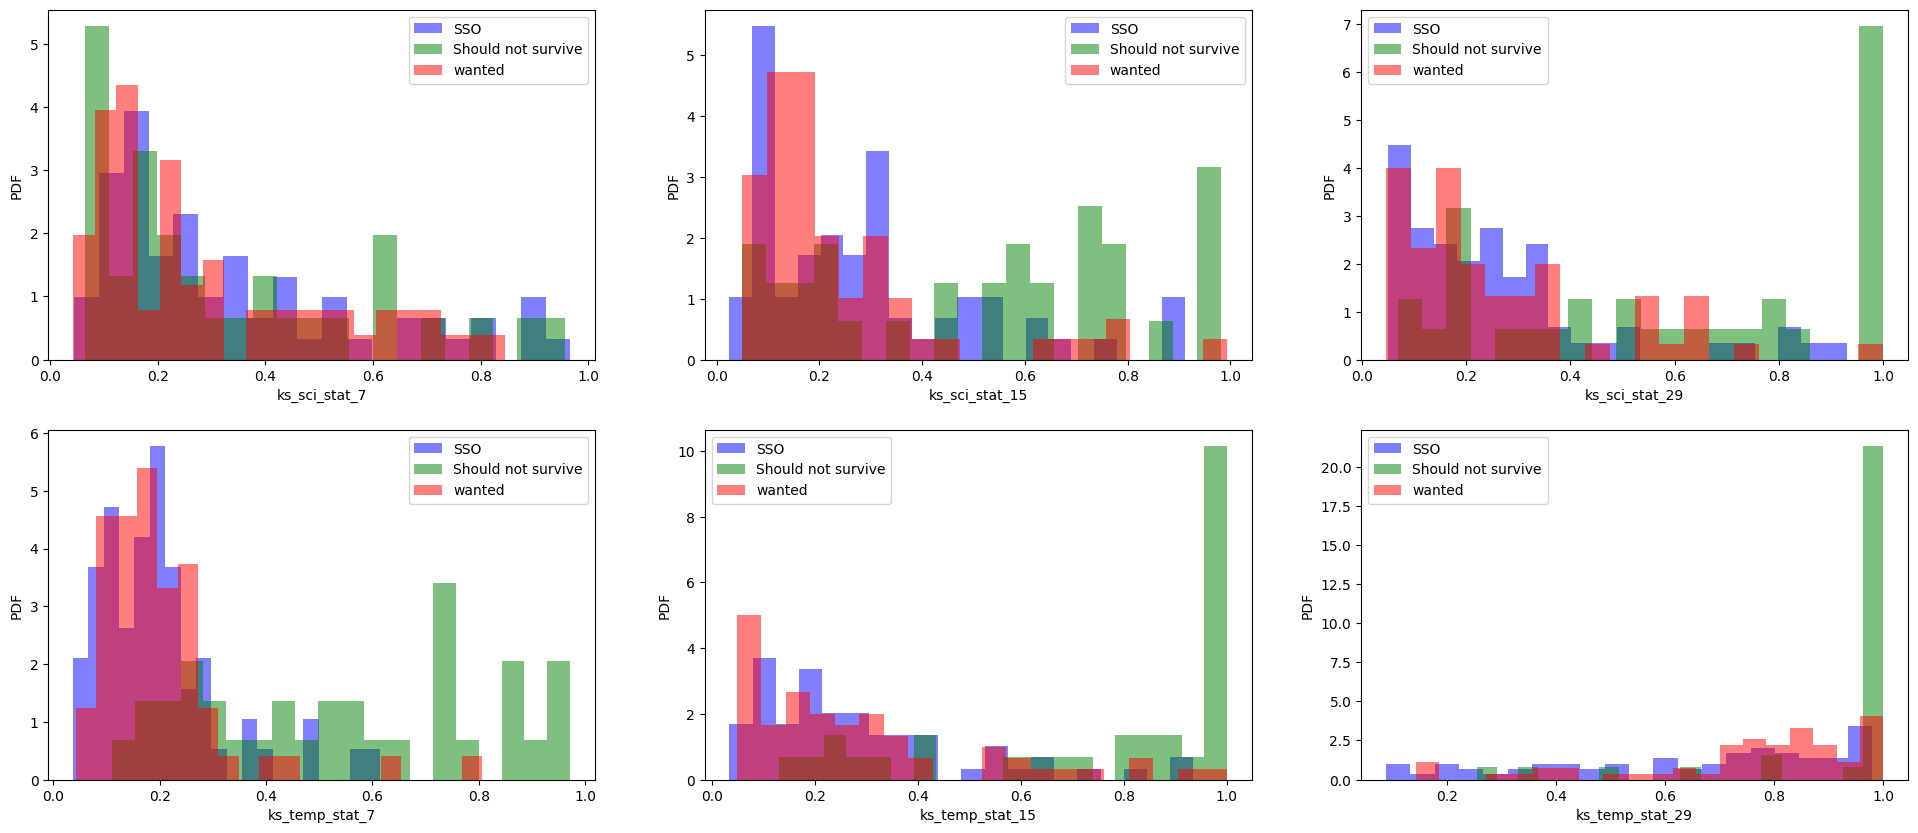

In [22]:
nbins = 20

plt.figure(figsize=(24,10))

for i in range(2, 8):
    name = list(data.keys())[i]
    
    plt.subplot(2,3,i-1)        
    plt.hist(sso[name], label='SSO', density=True, alpha=0.5, bins=nbins, color='blue')
    plt.hist(out[name], label='Should not survive', density=True, alpha=0.5, bins=nbins, color='green')
    plt.hist(wanted[name], label='wanted', density=True, alpha=0.5, bins=nbins, color='red')
    plt.xlabel(name)
    plt.ylabel('PDF')
    #plt.xscale('log')
    plt.legend()

plt.show()
#plt.savefig('kstest_2classesb_log.png')

In [23]:
out['ks_temp_stat_15'].describe()

count    34.000000
mean      0.760703
std       0.294396
min       0.130452
25%       0.586520
50%       0.903518
75%       0.999121
max       1.000000
Name: ks_temp_stat_15, dtype: float64

In [25]:
wanted['ks_temp_stat_15'].describe()

count    63.000000
mean      0.288191
std       0.235662
min       0.047538
25%       0.102475
50%       0.209296
75%       0.357827
max       0.999849
Name: ks_temp_stat_15, dtype: float64

In [24]:
classname, pop = np.unique(data[data['ks_temp_stat_15'] <= 0.4]['answer'].values, return_counts=True)

for i in range(len(classname)):
    print(classname[i], ':', pop[i])

SSO : 51
should_not_survive : 6
wanted : 50


In [35]:
pop[2]/sum(pop)

0.4672897196261682

In [59]:
max(sso['ks_sci_pvalue_7'])

0.3886871169211692

In [60]:
max(out['ks_sci_pvalue_7'])

0.3287728349733759

In [61]:
min(out['ks_sci_pvalue_7'])

1.0459243911689498e-30